## Data Processing Work and Visualizations

In this notebook I process the original dataset and create visualizations to help understand the data we are working with

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import plotly.express as px

Below I created a dictionary to map genres to more broad categories to minimize the number of one hot encoded columns.

In [1]:
genre_mapping = {
    'acoustic': 'Acoustic',
    'afrobeat': 'World',
    'alt-rock': 'Rock',
    'ambient': 'Electronic and Dance',
    'black-metal': 'Rock',
    'blues': 'Jazz and Blues',
    'breakbeat': 'Electronic and Dance',
    'cantopop': 'World',
    'chicago-house': 'Electronic and Dance',
    'chill': 'Electronic and Dance',
    'classical': 'Classical and Opera',
    'club': 'Electronic and Dance',
    'comedy': 'Miscellaneous',
    'country': 'Country and Folk',
    'dance': 'Electronic and Dance',
    'dancehall': 'Reggae and Tropical',
    'death-metal': 'Rock',
    'deep-house': 'Electronic and Dance',
    'detroit-techno': 'Electronic and Dance',
    'disco': 'Electronic and Dance',
    'drum-and-bass': 'Electronic and Dance',
    'dub': 'Electronic and Dance',
    'dubstep': 'Electronic and Dance',
    'edm': 'Electronic and Dance',
    'electro': 'Electronic and Dance',
    'electronic': 'Electronic and Dance',
    'emo': 'Miscellaneous',
    'folk': 'Country and Folk',
    'forro': 'Latin',
    'french': 'World',
    'funk': 'Electronic and Dance',
    'garage': 'Electronic and Dance',
    'german': 'World',
    'gospel': 'Spiritual and Religious',
    'goth': 'Miscellaneous',
    'grindcore': 'Rock',
    'groove': 'Hip-Hop and Urban',
    'guitar': 'Instrumental',
    'hard-rock': 'Rock',
    'hardcore': 'Rock',
    'hardstyle': 'Electronic and Dance',
    'heavy-metal': 'Rock',
    'hip-hop': 'Hip-Hop and Urban',
    'house': 'Electronic and Dance',
    'indian': 'World',
    'indie-pop': 'Pop',
    'industrial': 'Electronic and Dance',
    'jazz': 'Jazz and Blues',
    'k-pop': 'World',
    'metal': 'Rock',
    'metalcore': 'Rock',
    'minimal-techno': 'Electronic and Dance',
    'new-age': 'Instrumental',
    'opera': 'Classical and Opera',
    'party': 'Electronic and Dance',
    'piano': 'Instrumental',
    'pop': 'Pop',
    'pop-film': 'Pop',
    'power-pop': 'Pop',
    'progressive-house': 'Electronic and Dance',
    'psych-rock': 'Rock',
    'punk': 'Rock',
    'punk-rock': 'Rock',
    'rock': 'Rock',
    'rock-n-roll': 'Rock',
    'romance': 'Miscellaneous',
    'sad': 'Miscellaneous',
    'salsa': 'Latin',
    'samba': 'Latin',
    'sertanejo': 'Latin',
    'show-tunes': 'Theater',
    'singer-songwriter': 'Country and Folk',
    'ska': 'Reggae and Tropical',
    'songwriter': 'Country and Folk',
    'soul': 'Jazz and Blues',
    'spanish': 'World',
    'swedish': 'World',
    'tango': 'Latin',
    'techno': 'Electronic and Dance',
    'trance': 'Electronic and Dance',
    'trip-hop': 'Electronic and Dance'
}


In [14]:
df = pd.read_csv(r'C:\Users\jsull\UW Work\Stat 451\Project\betterspotify.csv') # load the data I got from kaggle
df = df.drop_duplicates(subset=['track_id']) # remove duplicate records from the data
df = df[df['genre'] != 'sleep'] # get rid of ambient sleep music from the data set
scaler = MinMaxScaler() # min-max scale the columns that are not yet in this format
columns_to_scale = ['loudness', 'tempo', 'duration_ms', 'popularity']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df['genre'] = df['genre'].replace(genre_mapping) # map genres to the generalized dictionary categories above
df = df.join(pd.get_dummies(df['genre'], drop_first=False)) # one hot encode the genre column
df = df.rename(columns={'Unnamed: 0': 'master_idx'}) # rename the index column
df[['Acoustic', 'Classical and Opera', 'Country and Folk',
       'Electronic and Dance', 'Hip-Hop and Urban', 'Instrumental',
       'Jazz and Blues', 'Latin', 'Miscellaneous', 'Pop',
       'Reggae and Tropical', 'Rock', 'Spiritual and Religious', 'Theater',
       'World']] = df[['Acoustic', 'Classical and Opera', 'Country and Folk',
       'Electronic and Dance', 'Hip-Hop and Urban', 'Instrumental',
       'Jazz and Blues', 'Latin', 'Miscellaneous', 'Pop',
       'Reggae and Tropical', 'Rock', 'Spiritual and Religious', 'Theater',
       'World']].astype(int) # set the type of the one hot encoded columns to integer rather the boolean
pop = df.pop('popularity') 
df.insert(6, "popularity", pop) # move the popularity column up for readability
df.head()

,master_idx,artist_name,track_name,track_id,year,genre,popularity,danceability,energy,key,...,Instrumental,Jazz and Blues,Latin,Miscellaneous,Pop,Reggae and Tropical,Rock,Spiritual and Religious,Theater,World
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,2012,Acoustic,0.68,0.483,0.303,4,...,0,0,0,0,0,0,0,0,0,0
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,2012,Acoustic,0.50,0.572,0.454,3,...,0,0,0,0,0,0,0,0,0,0
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,2012,Acoustic,0.57,0.409,0.234,3,...,0,0,0,0,0,0,0,0,0,0
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,2012,Acoustic,0.58,0.392,0.251,10,...,0,0,0,0,0,0,0,0,0,0
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,2012,Acoustic,0.54,0.430,0.791,6,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# df.to_csv(r'C:\Users\jsull\UW Work\Stat 451\Project\processed_data.csv')

Data exploration

# Visualizations

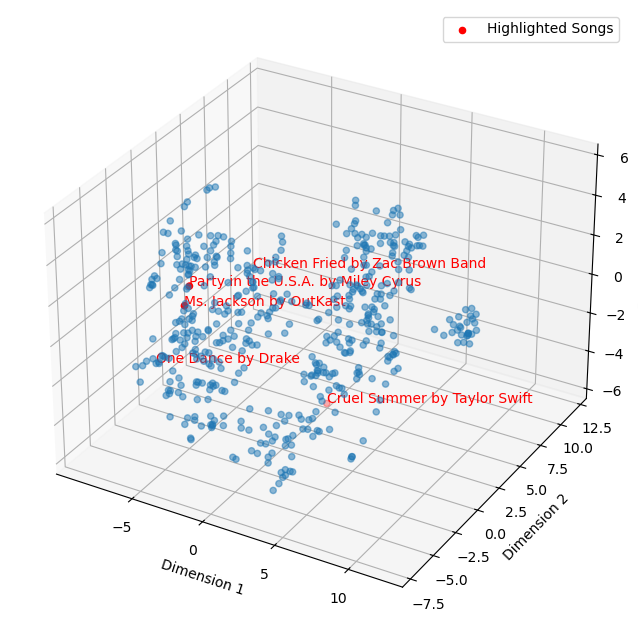

In [12]:

songs_to_highlight = {
    "Ms. Jackson": "OutKast",
    "Cruel Summer": "Taylor Swift",
    "Party in the U.S.A.": "Miley Cyrus",
    "One Dance": "Drake",
    "Chicken Fried": "Zac Brown Band"
}

highlight_mask = df.apply(lambda x: (x['track_name'], x['artist_name']) in songs_to_highlight.items(), axis=1)
highlighted_songs = df[highlight_mask]

other_songs = df[~highlight_mask].sample(n=500 - len(highlighted_songs))

b = pd.concat([highlighted_songs, other_songs])

model = TSNE(n_components=3, random_state=0)
tsne_data = model.fit_transform(b[floats])

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(tsne_data[len(highlighted_songs):, 0], tsne_data[len(highlighted_songs):, 1], tsne_data[len(highlighted_songs):, 2], alpha=0.5)

ax.scatter(tsne_data[:len(highlighted_songs), 0], tsne_data[:len(highlighted_songs), 1], tsne_data[:len(highlighted_songs), 2], c='r', label='Highlighted Songs')

for i, (song, artist) in enumerate(songs_to_highlight.items()):
    ax.text(tsne_data[i, 0], tsne_data[i, 1], tsne_data[i, 2], f'{song} by {artist}', color='red')

ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')

ax.legend()

plt.show()


Below is an interactive 3D plot of the TSNE dimensionality reduction of the data.

In [19]:
model = TSNE(n_components=3, random_state=0)
tsne_data = model.fit_transform(b)

# Convert the resulting t-SNE output into a DataFrame for easier plotting
tsne_df = pd.DataFrame(tsne_data, columns=['Dimension 1', 'Dimension 2', 'Dimension 3'])

# Create an interactive 3D scatter plot
fig = px.scatter_3d(tsne_df, x='Dimension 1', y='Dimension 2', z='Dimension 3',
                    title='3D t-SNE Visualization',
                    labels={'Dimension 1': 'Dimension 1', 'Dimension 2': 'Dimension 2', 'Dimension 3': 'Dimension 3'})

fig.show()

Finally I have plotted the distributions of each numeric column I use.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\jsull\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a

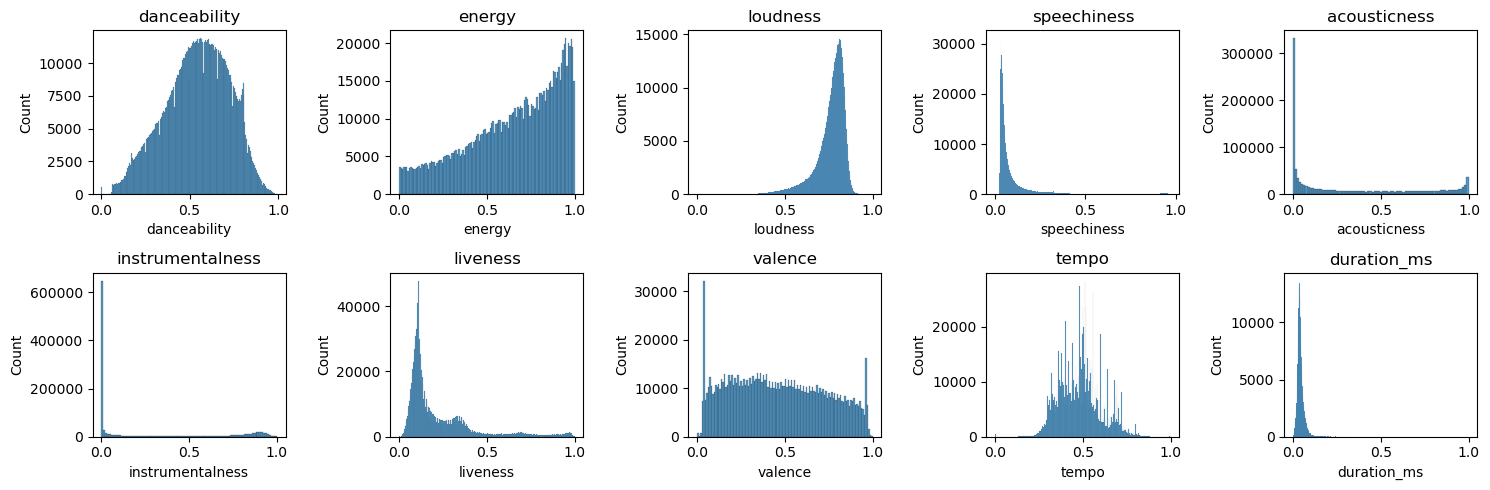

In [20]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5)) 

for i, col in enumerate(floats[1:]):
    ax = axes[i // 5, i % 5]  
    sns.histplot(df[col], ax=ax)
    ax.set_title(col)  

plt.tight_layout()  
plt.show()